In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv("housing.csv", names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT','PRICE'], header = None)
data.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [6]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [7]:
#checking unique values
data.nunique()

CRIM       452
ZN          27
INDUS       77
CHAS        16
NOX        132
RM         437
AGE        399
DIS        361
RAD         10
TAX         67
PTRATIO     85
B          374
LSTAT      445
PRICE      210
dtype: int64

In [8]:
data.isnull().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE      54
dtype: int64

In [9]:
data = data.dropna()

In [10]:
#Missing values check
data[data.isnull().any(axis=1)].head() #prices has 54 null value and we need to impute the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,1.420825,12.721239,10.304889,0.077434,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,2.495894,24.326032,6.797103,0.267574,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.069875,0.000000,4.930000,0.000000,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.191030,0.000000,8.140000,0.000000,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,1.211460,20.000000,18.100000,0.000000,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [12]:
#Correlation plot
corr = data.corr()
corr.shape

(14, 14)

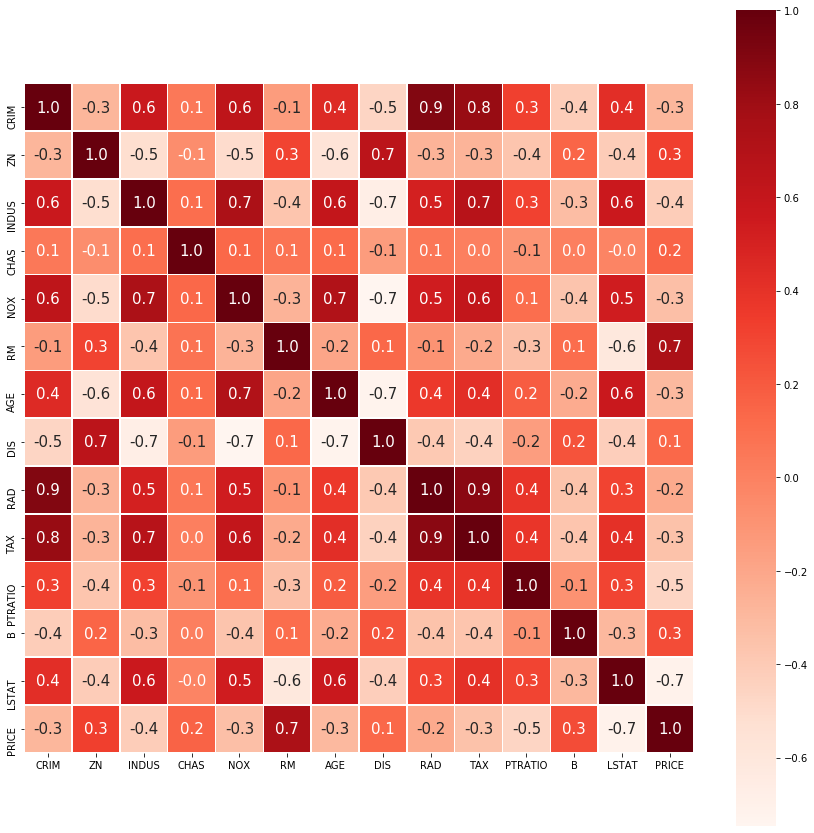

In [13]:
#Heat map for correlation
plt.figure(figsize=(15,15)) #decides the size of the image
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds', linewidth = 0.5)

In [14]:
#splitting target variable and independent variable
X = data.drop(['PRICE'], axis = 1)
Y = data['PRICE']

In [15]:
#splitting them to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

## LINEAR REGRESSION


#### training the model

In [16]:
#importing library
from sklearn.linear_model import LinearRegression

#creating linear regressor
lr = LinearRegression()

#train the model using training set
lr.fit(X_train, Y_train) #drop nan otherwise throw error

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lr.intercept_ #value of y intercept

21.550127507326124

#### Model Evaluation

In [18]:
y_pred = lr.predict(X_train)

In [19]:
#Evaluating model
print('R^2: ', metrics.r2_score(Y_train,y_pred))
# print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE: ', metrics.mean_absolute_error(Y_train,y_pred))
print('MSE: ', metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,y_pred)))

R^2:  0.7403225970999185
MAE:  2.86611343196035
MSE:  18.24409071946878
RMSE: 4.271310187690514


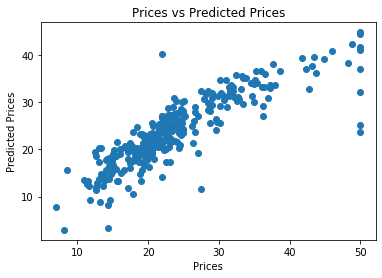

In [20]:
#visualizing the actual price and the predicted prices

plt.scatter(Y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

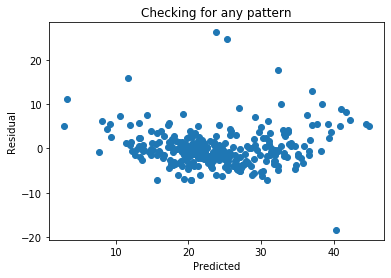

In [21]:
#Checking residual plot
plt.scatter(y_pred, Y_train-y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Checking for any pattern")
plt.show()

#There is no pattern visible in this plot and values are distributed equally around zero. 
#So Linearity assumption is satisfied

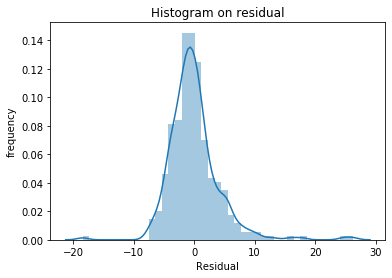

In [22]:
sns.distplot(Y_train-y_pred)
plt.title("Histogram on residual")
plt.xlabel("Residual")
plt.ylabel("frequency")
plt.show()

#Here the residuals are normally distributed. So normality assumption is satisfied

#### predicting test data

In [23]:
y_test_pred = lr.predict(X_test)

In [24]:
#model evaluation
acc_linreg = metrics.r2_score(Y_test, y_test_pred)
print("R^2: ", acc_linreg)
print("MAE: ", metrics.mean_absolute_error(Y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(Y_test, y_test_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

#Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

R^2:  0.732036504130758
MAE:  3.4301016596809273
MSE:  25.180362809153582
RMSE:  5.018003866992689


## RANDOM FOREST REGRESSOR

#### Train the model 

In [25]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Model predcition on train Data

In [26]:
y_pred = reg.predict(X_train)

#### Model Evaluation

In [27]:
print("R^2: ", metrics.r2_score(Y_train, y_pred))
print("MAE: ", metrics.mean_absolute_error(Y_train, y_pred))
print("MSE: ", metrics.mean_squared_error(Y_train, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2:  0.9746885272284593
MAE:  0.8836202531645575
MSE:  1.7783018481012638
RMSE:  1.3335298452232944


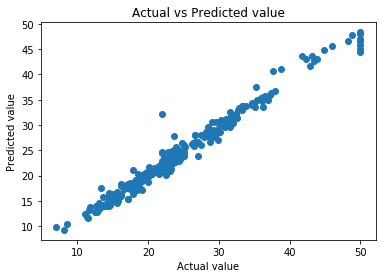

In [28]:
#Visualizing the differences between actual prices and the predicted prices
plt.scatter(Y_train, y_pred)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs Predicted value")
plt.show()

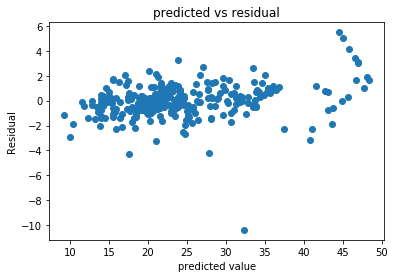

In [29]:
#Checking on the residual
plt.scatter(y_pred, Y_train-y_pred)
plt.xlabel("predicted value")
plt.ylabel("Residual")
plt.title("predicted vs residual")
plt.show()

#### predicting the test data

In [30]:
y_test_pred = reg.predict(X_test)

#### Model Evaluation

In [31]:
acc_random = metrics.r2_score(Y_test, y_test_pred)
print("R^2 : ", acc_random)
print("MAE: ", metrics.mean_absolute_error(Y_test, y_test_pred))
print("MSE: ", metrics.mean_squared_error(Y_test, y_test_pred))
print("RMSE : ", np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2 :  0.8904570787665496
MAE:  2.216551470588233
MSE:  10.293680080882345
RMSE :  3.2083765491105223


## XGBoost Regressor

In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Model Evaluator

In [33]:
y_pred = xgb.predict(X_train)

#### Model Evaluation

In [34]:
print('R^2:',metrics.r2_score(Y_train, y_pred))
#print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.9999989729380114
MAE: 0.005883424795126592
MSE: 7.215803872461283e-05
RMSE: 0.008494588790789865


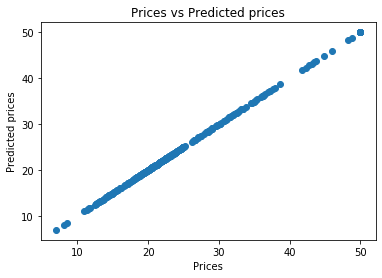

In [35]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

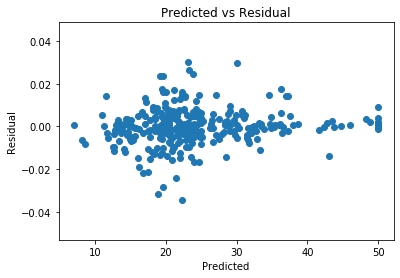

In [36]:
#residual
plt.scatter(Y_train, Y_train-y_pred)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Predicted vs Residual")
plt.show()

#### Predicting test data

In [37]:
y_test_pred = reg.predict(X_test)

In [38]:
acc_xgb = metrics.r2_score(Y_test, y_test_pred)
print('R^2:',acc_xgb)
#print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.8904570787665496
MAE: 2.216551470588233
MSE: 10.293680080882345
RMSE: 3.2083765491105223


## SVM Regressor

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### train the model

In [40]:
from sklearn import svm

svm_reg = svm.SVR()

In [41]:
svm_reg.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Model Evaluation

In [42]:
y_pred = svm_reg.predict(X_train)

In [43]:
print('R^2:',metrics.r2_score(Y_train, y_pred))
#print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_train, y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, y_pred)))

R^2: 0.6510940793642486
MAE: 2.841175439488562
MSE: 24.512996500845805
RMSE: 4.951060139085952


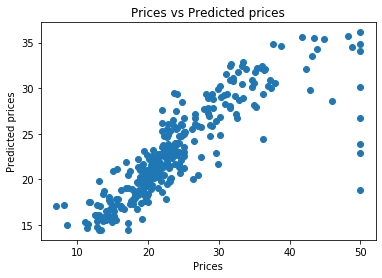

In [44]:
plt.scatter(Y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

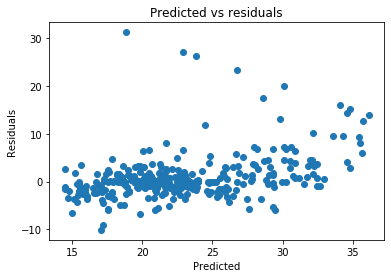

In [45]:
plt.scatter(y_pred,Y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

#### for Test data set

In [46]:
y_test_pred = svm_reg.predict(X_test)

#### Model Evaluate

In [47]:
acc_svm = metrics.r2_score(Y_test, y_test_pred)
print('R^2:', acc_svm)
#print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(Y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(Y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

R^2: 0.5425335609760945
MAE: 3.7719750353519044
MSE: 42.98783634788254
RMSE: 6.556510988924105


## Evaluation and Comparison of all the models

In [48]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_random*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,89.045708
2,XGBoost,89.045708
0,Linear Regression,73.203650
3,Support Vector Machines,54.253356
